In [1]:
import pandas as pd
import os
import zipfile
import matplotlib.pyplot as plt 
import numpy as np
import seaborn as sns


# Define the zip file path
zip_file_path = "/mnt/data/archive (13).zip"
extract_folder = "/mnt/data/extracted_files"

# Extract the ZIP file
with zipfile.ZipFile(r"C:\Users\mosta\Downloads\archive (13).zip", "r") as zip_ref:
    zip_ref.extractall(extract_folder)

# List all extracted files
csv_files = [f for f in os.listdir(extract_folder) if f.endswith(".csv")]

# Dictionary to store DataFrames
dfs = {}

# Read all CSV files into separate DataFrames
for file in csv_files:
    file_path = os.path.join(extract_folder, file)
    df_name = file.replace(".csv", "")  # Use file name as key
    dfs[df_name] = pd.read_csv(file_path)  # Read CSV file

# Print loaded DataFrames
print(f"Loaded {len(dfs)} CSV files: {list(dfs.keys())}")

# Example: Display first 5 rows of a specific DataFrame
print(dfs["blinkit_delivery_performance"].head())  # Change based on available file names
print(type(dfs))


Loaded 9 CSV files: ['blinkit_customers', 'blinkit_customer_feedback', 'blinkit_delivery_performance', 'blinkit_inventory', 'blinkit_inventoryNew', 'blinkit_marketing_performance', 'blinkit_orders', 'blinkit_order_items', 'blinkit_products']
     order_id  delivery_partner_id        promised_time          actual_time  \
0  1961864118                63230  2024-07-17 08:52:01  2024-07-17 08:47:01   
1  1549769649                14983  2024-05-28 13:25:29  2024-05-28 13:27:29   
2  9185164487                39859  2024-09-23 13:25:12  2024-09-23 13:29:12   
3  9644738826                61497  2023-11-24 16:34:56  2023-11-24 16:33:56   
4  5427684290                84315  2023-11-20 05:17:39  2023-11-20 05:18:39   

   delivery_time_minutes  distance_km delivery_status reasons_if_delayed  
0                   -5.0         0.96         On Time                NaN  
1                    2.0         0.98         On Time            Traffic  
2                    4.0         3.83         On Tim

In [2]:
df_iinventory = dfs['blinkit_products'].merge(dfs['blinkit_order_items'], on='product_id')
df_iinventory

,product_id,product_name,category,brand,price,mrp,margin_percentage,shelf_life_days,min_stock_level,max_stock_level,order_id,quantity,unit_price
0,153019,Onions,Fruits & Vegetables,Aurora LLC,947.95,1263.93,25.0,3,13,88,7169974633,2,947.95
1,153019,Onions,Fruits & Vegetables,Aurora LLC,947.95,1263.93,25.0,3,13,88,1409944718,3,947.95
2,153019,Onions,Fruits & Vegetables,Aurora LLC,947.95,1263.93,25.0,3,13,88,5388191488,3,947.95
3,153019,Onions,Fruits & Vegetables,Aurora LLC,947.95,1263.93,25.0,3,13,88,8441505853,3,947.95
4,153019,Onions,Fruits & Vegetables,Aurora LLC,947.95,1263.93,25.0,3,13,88,271744331,3,947.95
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,114414,Vitamins,Pharmacy,Kara-Golla,832.06,1040.07,20.0,365,26,66,7543192113,1,832.06
4996,114414,Vitamins,Pharmacy,Kara-Golla,832.06,1040.07,20.0,365,26,66,2399383238,1,832.06
4997,114414,Vitamins,Pharmacy,Kara-Golla,832.06,1040.07,20.0,365,26,66,2211459584,1,832.06
4998,114414,Vitamins,Pharmacy,Kara-Golla,832.06,1040.07,20.0,365,26,66,576571858,3,832.06


In [3]:
df_iinventory['total_sold_units']= df_iinventory.groupby('product_id')['quantity'].transform('sum')
df_iinventory

,product_id,product_name,category,brand,price,mrp,margin_percentage,shelf_life_days,min_stock_level,max_stock_level,order_id,quantity,unit_price,total_sold_units
0,153019,Onions,Fruits & Vegetables,Aurora LLC,947.95,1263.93,25.0,3,13,88,7169974633,2,947.95,41
1,153019,Onions,Fruits & Vegetables,Aurora LLC,947.95,1263.93,25.0,3,13,88,1409944718,3,947.95,41
2,153019,Onions,Fruits & Vegetables,Aurora LLC,947.95,1263.93,25.0,3,13,88,5388191488,3,947.95,41
3,153019,Onions,Fruits & Vegetables,Aurora LLC,947.95,1263.93,25.0,3,13,88,8441505853,3,947.95,41
4,153019,Onions,Fruits & Vegetables,Aurora LLC,947.95,1263.93,25.0,3,13,88,271744331,3,947.95,41
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,114414,Vitamins,Pharmacy,Kara-Golla,832.06,1040.07,20.0,365,26,66,7543192113,1,832.06,36
4996,114414,Vitamins,Pharmacy,Kara-Golla,832.06,1040.07,20.0,365,26,66,2399383238,1,832.06,36
4997,114414,Vitamins,Pharmacy,Kara-Golla,832.06,1040.07,20.0,365,26,66,2211459584,1,832.06,36
4998,114414,Vitamins,Pharmacy,Kara-Golla,832.06,1040.07,20.0,365,26,66,576571858,3,832.06,36


In [4]:
pivot_inventory = df_iinventory.pivot_table(index=['product_id', 'product_name','brand','category'], values='quantity', aggfunc='sum').reset_index()
pivot_inventory.set_index('product_id', inplace=True)
pivot_inventory

,product_name,brand,category,quantity
product_id,,,,
4452,Baby Wipes,Morar-Mistry,Baby Care,39
6405,Baby Food,Kashyap-Reddy,Baby Care,34
9436,Toothpaste,Naidu PLC,Personal Care,44
11422,Potatoes,Ramaswamy-Tata,Fruits & Vegetables,27
14145,Spinach,"Thakur, Shah and Pingle",Fruits & Vegetables,40
...,...,...,...,...
970529,Diapers,"Kurian, Patla and Sanghvi",Baby Care,45
990993,Chocolates,Guha-Subramaniam,Snacks & Munchies,37
991434,Cookies,Mital-Oza,Snacks & Munchies,44


In [5]:

df_iinventory.drop_duplicates(subset=['product_id'], keep='first', inplace=True)
df_iinventory.set_index('product_id', inplace=True)
df_iinventory.drop('order_id' , axis=1, inplace=True)
df_iinventory

,product_name,category,brand,price,mrp,margin_percentage,shelf_life_days,min_stock_level,max_stock_level,quantity,unit_price,total_sold_units
product_id,,,,,,,,,,,,
153019,Onions,Fruits & Vegetables,Aurora LLC,947.95,1263.93,25.0,3,13,88,2,947.95,41
11422,Potatoes,Fruits & Vegetables,Ramaswamy-Tata,127.16,169.55,25.0,3,20,65,2,127.16,27
669378,Potatoes,Fruits & Vegetables,Chadha and Sons,212.14,282.85,25.0,3,23,70,1,212.14,41
848226,Tomatoes,Fruits & Vegetables,Barad and Sons,209.59,279.45,25.0,3,10,51,3,209.59,31
890623,Onions,Fruits & Vegetables,"Sangha, Nagar and Varty",354.52,472.69,25.0,3,27,55,1,354.52,13
...,...,...,...,...,...,...,...,...,...,...,...,...
444361,Pain Reliever,Pharmacy,"Prakash, Bawa and Kale",822.63,1028.29,20.0,365,20,71,3,822.63,50
679284,Cough Syrup,Pharmacy,Pant LLC,877.89,1097.36,20.0,365,28,95,1,877.89,42
240179,Cough Syrup,Pharmacy,Ram-Suri,90.56,113.20,20.0,365,20,56,3,90.56,41


In [6]:

df_iinventory['gross_profit_per_unit'] = df_iinventory['price'] * df_iinventory['margin_percentage'] / 100
df_iinventory

,product_name,category,brand,price,mrp,margin_percentage,shelf_life_days,min_stock_level,max_stock_level,quantity,unit_price,total_sold_units,gross_profit_per_unit
product_id,,,,,,,,,,,,,
153019,Onions,Fruits & Vegetables,Aurora LLC,947.95,1263.93,25.0,3,13,88,2,947.95,41,236.9875
11422,Potatoes,Fruits & Vegetables,Ramaswamy-Tata,127.16,169.55,25.0,3,20,65,2,127.16,27,31.7900
669378,Potatoes,Fruits & Vegetables,Chadha and Sons,212.14,282.85,25.0,3,23,70,1,212.14,41,53.0350
848226,Tomatoes,Fruits & Vegetables,Barad and Sons,209.59,279.45,25.0,3,10,51,3,209.59,31,52.3975
890623,Onions,Fruits & Vegetables,"Sangha, Nagar and Varty",354.52,472.69,25.0,3,27,55,1,354.52,13,88.6300
...,...,...,...,...,...,...,...,...,...,...,...,...,...
444361,Pain Reliever,Pharmacy,"Prakash, Bawa and Kale",822.63,1028.29,20.0,365,20,71,3,822.63,50,164.5260
679284,Cough Syrup,Pharmacy,Pant LLC,877.89,1097.36,20.0,365,28,95,1,877.89,42,175.5780
240179,Cough Syrup,Pharmacy,Ram-Suri,90.56,113.20,20.0,365,20,56,3,90.56,41,18.1120


In [7]:
df_iinventory['gross_profit_per_unit'] = (df_iinventory['margin_percentage'] / 100) * df_iinventory['price']
df_iinventory

,product_name,category,brand,price,mrp,margin_percentage,shelf_life_days,min_stock_level,max_stock_level,quantity,unit_price,total_sold_units,gross_profit_per_unit
product_id,,,,,,,,,,,,,
153019,Onions,Fruits & Vegetables,Aurora LLC,947.95,1263.93,25.0,3,13,88,2,947.95,41,236.9875
11422,Potatoes,Fruits & Vegetables,Ramaswamy-Tata,127.16,169.55,25.0,3,20,65,2,127.16,27,31.7900
669378,Potatoes,Fruits & Vegetables,Chadha and Sons,212.14,282.85,25.0,3,23,70,1,212.14,41,53.0350
848226,Tomatoes,Fruits & Vegetables,Barad and Sons,209.59,279.45,25.0,3,10,51,3,209.59,31,52.3975
890623,Onions,Fruits & Vegetables,"Sangha, Nagar and Varty",354.52,472.69,25.0,3,27,55,1,354.52,13,88.6300
...,...,...,...,...,...,...,...,...,...,...,...,...,...
444361,Pain Reliever,Pharmacy,"Prakash, Bawa and Kale",822.63,1028.29,20.0,365,20,71,3,822.63,50,164.5260
679284,Cough Syrup,Pharmacy,Pant LLC,877.89,1097.36,20.0,365,28,95,1,877.89,42,175.5780
240179,Cough Syrup,Pharmacy,Ram-Suri,90.56,113.20,20.0,365,20,56,3,90.56,41,18.1120


In [8]:
df_iinventory['stock_turnover'] = (df_iinventory['total_sold_units'] / df_iinventory['max_stock_level']*100)
df_iinventory


,product_name,category,brand,price,mrp,margin_percentage,shelf_life_days,min_stock_level,max_stock_level,quantity,unit_price,total_sold_units,gross_profit_per_unit,stock_turnover
product_id,,,,,,,,,,,,,,
153019,Onions,Fruits & Vegetables,Aurora LLC,947.95,1263.93,25.0,3,13,88,2,947.95,41,236.9875,46.590909
11422,Potatoes,Fruits & Vegetables,Ramaswamy-Tata,127.16,169.55,25.0,3,20,65,2,127.16,27,31.7900,41.538462
669378,Potatoes,Fruits & Vegetables,Chadha and Sons,212.14,282.85,25.0,3,23,70,1,212.14,41,53.0350,58.571429
848226,Tomatoes,Fruits & Vegetables,Barad and Sons,209.59,279.45,25.0,3,10,51,3,209.59,31,52.3975,60.784314
890623,Onions,Fruits & Vegetables,"Sangha, Nagar and Varty",354.52,472.69,25.0,3,27,55,1,354.52,13,88.6300,23.636364
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
444361,Pain Reliever,Pharmacy,"Prakash, Bawa and Kale",822.63,1028.29,20.0,365,20,71,3,822.63,50,164.5260,70.422535
679284,Cough Syrup,Pharmacy,Pant LLC,877.89,1097.36,20.0,365,28,95,1,877.89,42,175.5780,44.210526
240179,Cough Syrup,Pharmacy,Ram-Suri,90.56,113.20,20.0,365,20,56,3,90.56,41,18.1120,73.214286


In [9]:
df_iinventory['stock_turnover'] = df_iinventory['stock_turnover'].map(lambda x: f"{x:.2f}%")
df_iinventory

,product_name,category,brand,price,mrp,margin_percentage,shelf_life_days,min_stock_level,max_stock_level,quantity,unit_price,total_sold_units,gross_profit_per_unit,stock_turnover
product_id,,,,,,,,,,,,,,
153019,Onions,Fruits & Vegetables,Aurora LLC,947.95,1263.93,25.0,3,13,88,2,947.95,41,236.9875,46.59%
11422,Potatoes,Fruits & Vegetables,Ramaswamy-Tata,127.16,169.55,25.0,3,20,65,2,127.16,27,31.7900,41.54%
669378,Potatoes,Fruits & Vegetables,Chadha and Sons,212.14,282.85,25.0,3,23,70,1,212.14,41,53.0350,58.57%
848226,Tomatoes,Fruits & Vegetables,Barad and Sons,209.59,279.45,25.0,3,10,51,3,209.59,31,52.3975,60.78%
890623,Onions,Fruits & Vegetables,"Sangha, Nagar and Varty",354.52,472.69,25.0,3,27,55,1,354.52,13,88.6300,23.64%
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
444361,Pain Reliever,Pharmacy,"Prakash, Bawa and Kale",822.63,1028.29,20.0,365,20,71,3,822.63,50,164.5260,70.42%
679284,Cough Syrup,Pharmacy,Pant LLC,877.89,1097.36,20.0,365,28,95,1,877.89,42,175.5780,44.21%
240179,Cough Syrup,Pharmacy,Ram-Suri,90.56,113.20,20.0,365,20,56,3,90.56,41,18.1120,73.21%


In [10]:
top_profitable_products = df_iinventory.sort_values(by='gross_profit_per_unit', ascending=False).head(10)
top_profitable_products

,product_name,category,brand,price,mrp,margin_percentage,shelf_life_days,min_stock_level,max_stock_level,quantity,unit_price,total_sold_units,gross_profit_per_unit,stock_turnover
product_id,,,,,,,,,,,,,,
305754,Frozen Vegetables,Instant & Frozen Food,Mammen-Hegde,979.99,1633.32,40.0,180,22,81,1,979.99,43,391.9960,53.09%
491314,Ice Cream,Instant & Frozen Food,Banerjee Inc,973.44,1622.40,40.0,180,11,71,3,973.44,26,389.3760,36.62%
602241,Nuts,Snacks & Munchies,Bahl-Pau,976.55,1502.38,35.0,90,12,75,2,976.55,38,341.7925,50.67%
690565,Cookies,Snacks & Munchies,"Roy, Seth and Patla",951.27,1463.49,35.0,90,15,56,1,951.27,29,332.9445,51.79%
803607,Soap,Personal Care,"Kadakia, Mohan and Sathe",949.73,1461.12,35.0,365,21,98,1,949.73,36,332.4055,36.73%
470449,Frozen Biryani,Instant & Frozen Food,Kohli-Sawhney,827.77,1379.62,40.0,180,27,57,3,827.77,22,331.1080,38.60%
366066,Soap,Personal Care,Mandal LLC,918.58,1413.20,35.0,365,16,52,1,918.58,34,321.5030,65.38%
256783,Pet Treats,Pet Care,"Basu, Thakur and Rege",906.54,1394.68,35.0,365,16,98,2,906.54,46,317.2890,46.94%
726958,Cat Food,Pet Care,Doctor-Patla,887.48,1365.35,35.0,365,18,79,3,887.48,43,310.6180,54.43%


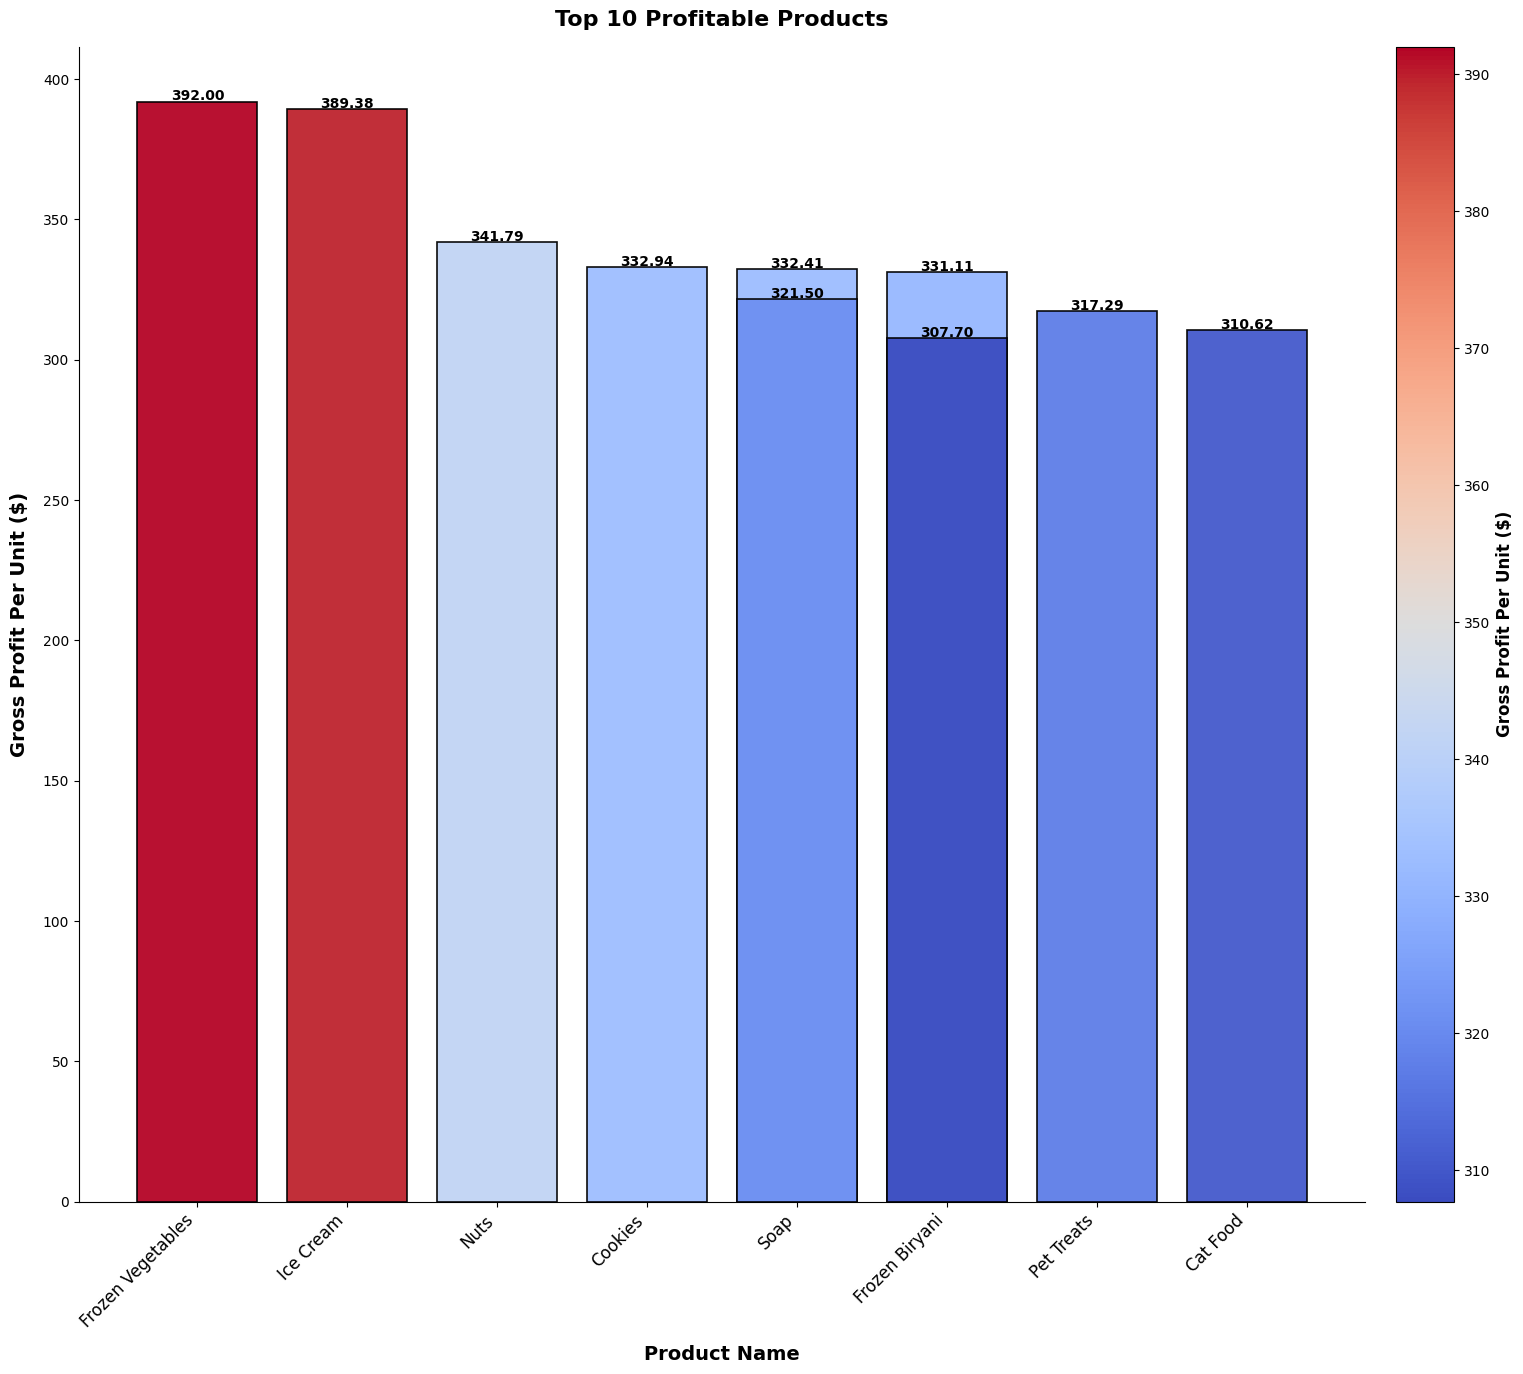

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Sort the data by 'gross_profit_per_unit' in descending order
top_profitable_products = top_profitable_products.sort_values(by='gross_profit_per_unit', ascending=False)

# Define color gradient
norm = plt.Normalize(top_profitable_products['gross_profit_per_unit'].min(), 
                     top_profitable_products['gross_profit_per_unit'].max())
colors = plt.cm.coolwarm(norm(top_profitable_products['gross_profit_per_unit']))  # Try 'plasma', 'magma', or 'viridis' for variations

# Set up the figure
fig, ax = plt.subplots(figsize=(20, 15))
bars = ax.bar(top_profitable_products['product_name'], top_profitable_products['gross_profit_per_unit'], 
              color=colors, alpha=0.95, edgecolor='black', linewidth=1.2)

# Add labels on bars
for bar in bars:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval + 0.5, f"{yval:.2f}", 
            ha='center', fontsize=10, fontweight='bold', color='black')

# Styling the chart
ax.set_xlabel("Product Name", fontsize=14, fontweight='bold', labelpad=10)
ax.set_ylabel("Gross Profit Per Unit ($)", fontsize=14, fontweight='bold', labelpad=10)
ax.set_title("Top 10 Profitable Products", fontsize=16, fontweight='bold', pad=15)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right', fontsize=12)

# Remove top and right spines
sns.despine()

# Add color bar for reference
sm = plt.cm.ScalarMappable(cmap='coolwarm', norm=norm)
sm.set_array([])
cbar = plt.colorbar(sm, ax=ax, pad=0.02)
cbar.set_label("Gross Profit Per Unit ($)", fontsize=12, fontweight='bold')

# Show the plot
plt.show()
